<a href="https://colab.research.google.com/github/s18889/Kolokwium_2/blob/master/ZUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('TEST Colab integration with private repo')

TEST Colab integration with private repo


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
#Requaierd imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##from datasets import load_dataset
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Hugging face

In [ ]:
!pip install datasets

In [ ]:
#Dowlanding data.

# Load a dataset from Hugging Face
dataset = load_dataset("barilan/blog_authorship_corpus")


In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'date', 'gender', 'age', 'horoscope', 'job'],
        num_rows: 689793
    })
    validation: Dataset({
        features: ['text', 'date', 'gender', 'age', 'horoscope', 'job'],
        num_rows: 37919
    })
})


In [ ]:
dataTrain = pd.DataFrame(dataset['train'])
dataTrain["source"] = "train"
dataTest = pd.DataFrame(dataset['validation'])
dataTest["source"] = "test"
combined_df = pd.concat([dataTrain, dataTest], ignore_index=True)

In [ ]:
combined_df.head()

,text,date,gender,age,horoscope,job,source
0,"Yeah, sorry for not writing for a whole there,...","23,November,2002",female,17,Libra,Student,train
1,"Yeah, so today was ok, late arrival. I'm not i...","20,November,2002",female,17,Libra,Student,train
2,"Yay, Tuesday...no longer Monday! Whoopie! Plus...","19,November,2002",female,17,Libra,Student,train
3,RAR!,"18,November,2002",female,17,Libra,Student,train
4,"Thought- OK...so, I'm all for midgets and what...","18,November,2002",female,17,Libra,Student,train


#Jednak w hugging face zbiór nie ma najbardziej potrzebnaj nam kolumny id. :(

In [12]:
#pobierz dane
orginal = pd.read_csv('/content/drive/MyDrive/Data/blogtext (1).csv')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
orginal.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [15]:
orginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [16]:
orginal.describe()

,id,age
count,6.812840e+05,681284.000000
mean,2.397802e+06,23.932326
std,1.247723e+06,7.786009
min,5.114000e+03,13.000000
25%,1.239610e+06,17.000000
50%,2.607577e+06,24.000000
75%,3.525660e+06,26.000000
max,4.337650e+06,48.000000


In [17]:
orginal.isnull().sum()

,0
id,0
gender,0
age,0
topic,0
sign,0
date,0
text,0


In [18]:
#Mamy trochę duplikatów w treści
#Trzeba będzie usunąć
orginal["text"].duplicated().sum()

69632

In [ ]:
#Lengh of texts
#TODO delete shorter dhan 100
orginal["text"].apply(len).describe()

,text
count,681284.000000
mean,1120.730698
std,2328.437003
min,4.000000
25%,230.000000
50%,637.000000
75%,1407.000000
max,790123.000000


<Axes: >

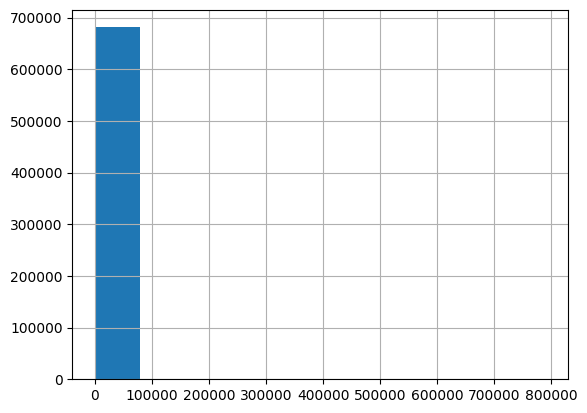

In [25]:
#Show histogram of text lenght
orginal["text"].apply(len).hist()

<Axes: >

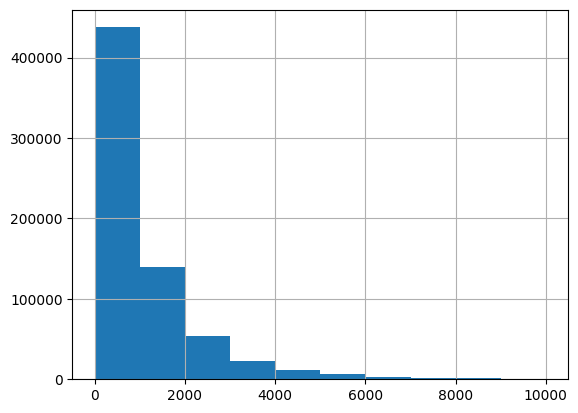

In [26]:
lenghts = orginal["text"].apply(len)
lenghts[lenghts < 10000].hist()

<Axes: >

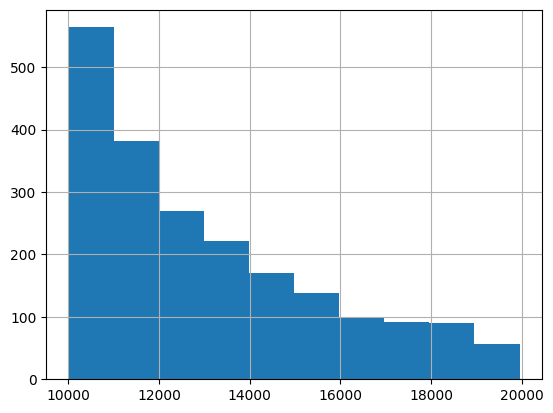

In [32]:
lenghts[(lenghts > 10000) & (lenghts < 20000)].hist()

In [33]:
orginal[orginal["text"].apply(len) > 700000]

,id,gender,age,topic,sign,date,text
529872,3163832,female,41,indUnk,Aquarius,"21,July,2004",Excerpts from the HRW report: [prologu...


In [ ]:
#Show text shortest text
orginal[orginal["text"].apply(len) == 4]

In [19]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [34]:
#Chceck word count.
shorter = orginal[0:1000]
word_tokenize_list = shorter["text"].apply(lambda x: len(word_tokenize(x)))
word_tokenize_list.describe()

,text
count,1000.000000
mean,331.694000
std,341.591524
min,0.000000
25%,109.750000
50%,246.500000
75%,452.250000
max,5018.000000


<Axes: >

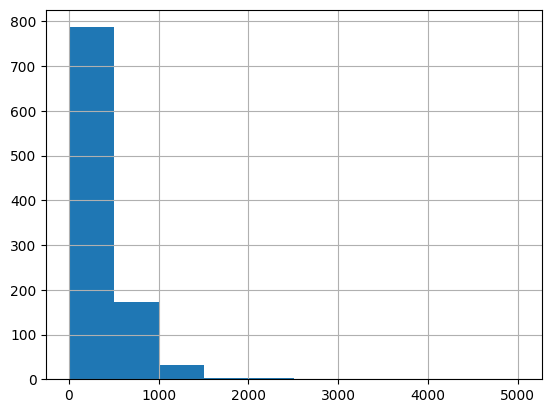

In [35]:
word_tokenize_list.hist()

<Axes: >

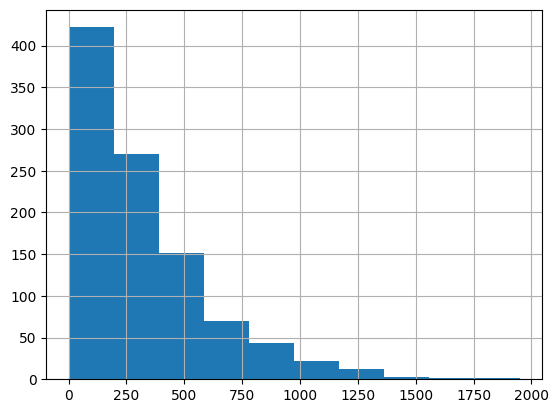

In [36]:
word_tokenize_list[word_tokenize_list<2000].hist()

In [38]:
#generate word cloud for "text" column
from wordcloud import WordCloud
text = ' '.join(orginal[0:10000]['text'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

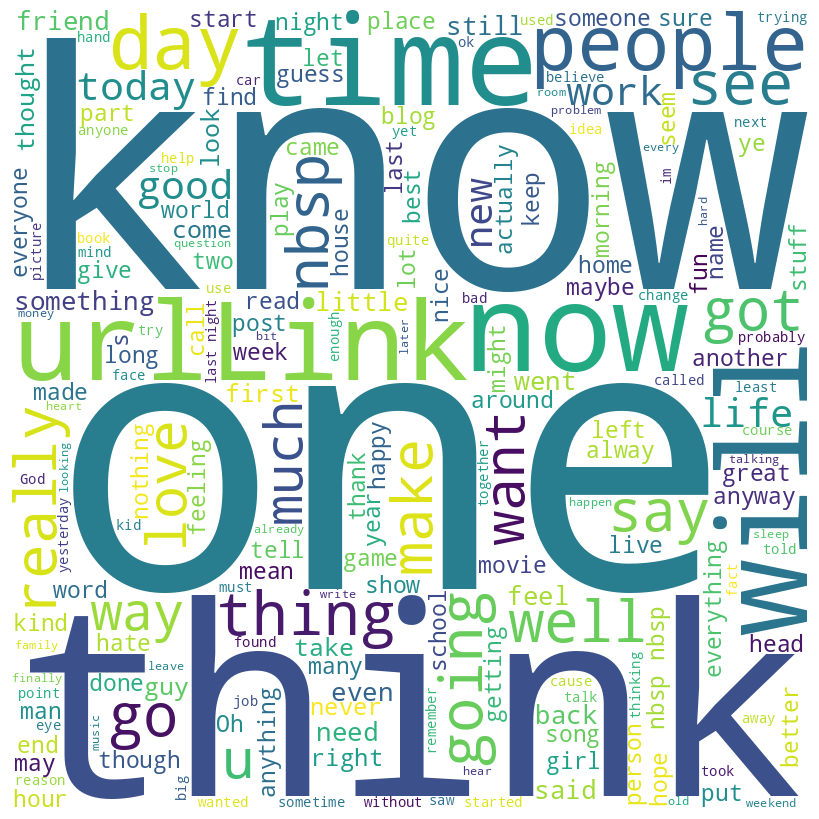

In [40]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Przygotowanie zbioru danych.

In [20]:
prepared = orginal.copy(deep=False)

In [21]:
#Delete useless data and duplikates.

#Drop useles columns
prepared.drop(columns=["gender","age","topic","sign"], inplace=True)
#Drop duplikates in column text
print(prepared.shape)
prepared.drop_duplicates(subset=["text"], inplace=True)
print(prepared.shape)
#Drop texts shorter than 100 leters
prepared = prepared[prepared["text"].apply(len) > 100]
print(prepared.shape)

(681284, 3)
(611652, 3)
(548927, 3)


In [22]:
#test ile zajmie tokenizacja.
import time
#Lowercasing
prepared["text"] = prepared["text"].str.lower()
#Tokenisation
start_time = time.time()
prepared[0:1000]["text"].apply(lambda x: word_tokenize(x))
end = time.time()
print((end - start_time)*600)

2868.895196914673


In [23]:
#Lowercasing
prepared["text"] = prepared["text"].str.lower()
#Removing extra spaces
#prepared["text"] = prepared["text"].str.replace(r'\s+', ' ', regex=True)

In [37]:
#Delete rows with text longer than 20000 characters
prepared = prepared[prepared["text"].apply(len) < 20000]

In [24]:
#Tokenisation
prepared["text"] = prepared["text"].apply(lambda x: word_tokenize(x))

KeyboardInterrupt: 

In [ ]:
#Removing stop words
stop_words = set(stopwords.words('english'))
prepared["text"] = prepared["text"].apply(lambda x: [word for word in x if word not in stop_words])
#Removing punctuation
prepared["text"] = prepared["text"].apply(lambda x: [word for word in x if word.isalpha()])

In [ ]:
prepared.head()